# Notebook in R
Investigates whether male critics rate _Klovn_ higher than female film critics.

It is based on a Bayesian simulation:
- http://lingpipe-blog.com/2009/10/13/bayesian-counterpart-to-fisher-exact-test-on-contingency-tables/
- http://www.stat.columbia.edu/~cook/movabletype/archives/2009/10/what_is_the_bay.html

## Data

In [13]:
n1 = 14 # All men
y1 = 9 # '5' men
n2 = 4 # All women
y2 = 2 # '5' women

## Bayesian simulation

In [14]:
I = 100000 # simulations
hyperprior = 0.5
males = rbeta(I, y1+hyperprior, (n1-y1)+hyperprior)
females = rbeta(I, y2+hyperprior, (n2-y2)+hyperprior)
diff = males-females  # simulated diffs

## Output

In [15]:
# OUTPUT
quantiles = quantile(diff,c(0.005,0.025,0.5,0.975,0.995))
print(quantiles,digits=2)

print("Probability higher % men than women '5':")
print(mean(males>females))

 0.5%  2.5%   50% 97.5% 99.5% 
-0.44 -0.32  0.13  0.58  0.68 
[1] "Probability higher % men than women '5':"
[1] 0.6992


## Plot posterior

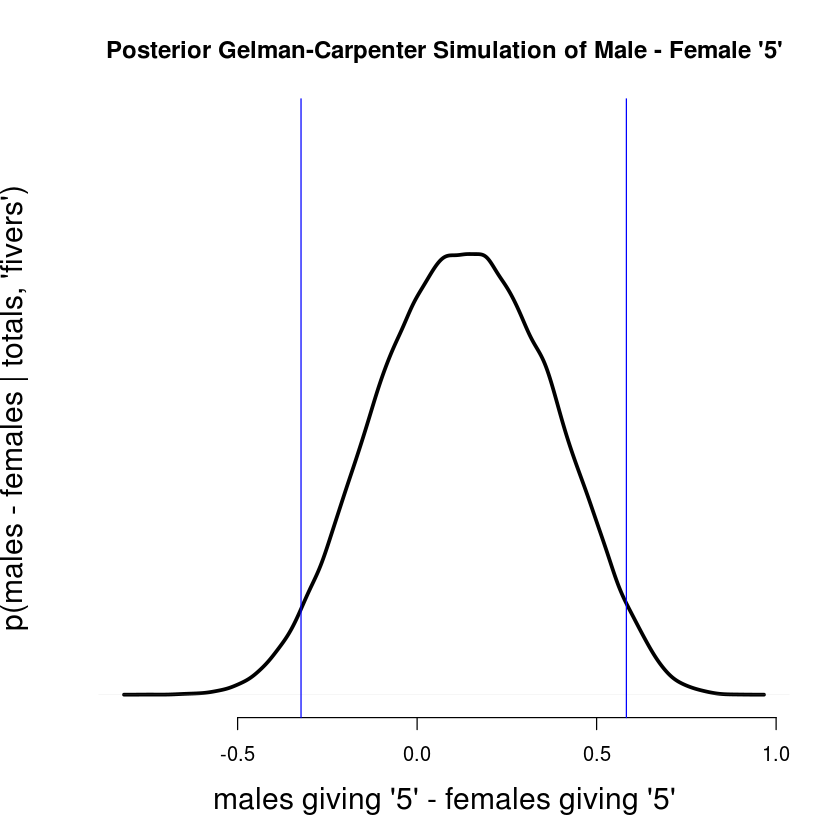

In [16]:
plot(density(diff),
     xlab="males giving '5' - females giving '5'",
     ylab="p(males - females | totals, 'fivers')",
     main="Posterior Gelman-Carpenter Simulation of Male - Female '5'",
     ylim=c(0,2),
     frame.plot=FALSE,cex.lab=1.5,lwd=3,yaxt="no")
abline(v=quantiles[2], col="blue")
abline(v=quantiles[4], col="blue")